In [95]:
!pip3 install contractions

     |████████████████████████████████| 284 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 20.7 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp38-cp38-macosx_10_9_x86_64.whl size=32387 sha256=6cfb7fca7d688c840cd8c5752bc7c09c4f17d901f19531d8145b4ebb9f462cae
  Stored in directory: /Users/psicurello/Library/Caches/pip/wheels/74/bc/b8/e5f739a84005620cfe66d3fcb8bb182e309d6056bc6700b60e
Successfully built pyahocorasick


In [135]:
import pandas as pd
import numpy as np
import nltk
import re
import contractions
import matplotlib.pyplot as plt
import spacy

from nltk import tokenize
from nltk.corpus import stopwords

In [84]:
wikihow = pd.read_csv("wikihowAll.csv")
wikihow.head()

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [88]:
wikihow['text'][0]

" If you're a photographer, keep all the necessary lens, cords, and batteries in the same quadrant of your home or studio. Paints should be kept with brushes, cleaner, and canvas, print supplies should be by the ink, etc. Make broader groups and areas for your supplies to make finding them easier, limiting your search to a much smaller area. Some ideas include:Essential supplies area -- the things you use every day.Inspiration and reference area.Dedicated work area .Infrequent or secondary supplies area, tucked out of the way.;, This doesn't mean cleaning the entire studio, it just means keeping the area immediately around the desk, easel, pottery wheel, etc. clean each night. Discard trash or unnecessary materials and wipe down dirty surfaces. Endeavor to leave the workspace in a way that you can sit down the next day and start working immediately, without having to do any work or tidying.Even if the rest of your studio is a bit disorganized, an organized workspace will help you get d

I noticed that there are some quirks in the WikiHow data. One is that we have newline tokens in our summary data. This is removed by replacing it with an empty string.

The other quirk is that there is a lot of double or even triple punctuation marks. I will delay removal of those to data cleaning in the next section.

In [89]:
#Remove newline characters
wikihow = wikihow.replace({"\n": " "}, regex=True)

In [90]:
#Make appendable to full_dat
wikihow = wikihow.rename({"text": "Text", "headline": "Summary"}, axis=1)
wikihow = wikihow.drop(["title"], axis=1)

In [91]:
#Save to csv format
wikihow.to_csv("sum_data.csv")

# Data Cleaning

In [98]:
#Load in data
data = pd.read_csv("sum_data.csv")

#Drop Null values
data.dropna(axis=0, inplace=True)

#Print Data Shape
print("Shape of data: ", data.shape)

Shape of data:  (214293, 3)


In [99]:
data['Text'][:10][0]

" If you're a photographer, keep all the necessary lens, cords, and batteries in the same quadrant of your home or studio. Paints should be kept with brushes, cleaner, and canvas, print supplies should be by the ink, etc. Make broader groups and areas for your supplies to make finding them easier, limiting your search to a much smaller area. Some ideas include:Essential supplies area -- the things you use every day.Inspiration and reference area.Dedicated work area .Infrequent or secondary supplies area, tucked out of the way.;, This doesn't mean cleaning the entire studio, it just means keeping the area immediately around the desk, easel, pottery wheel, etc. clean each night. Discard trash or unnecessary materials and wipe down dirty surfaces. Endeavor to leave the workspace in a way that you can sit down the next day and start working immediately, without having to do any work or tidying.Even if the rest of your studio is a bit disorganized, an organized workspace will help you get d

In [104]:
""" Here we set text to lower case, remove plurals, 
    expand contractions, remove punctuation, remove stopwords, and remove short words 
    (could also remove parentheticals)"""

stop = set(stopwords.words('english'))
def clean_text(text):
    ret = text.lower()
    ret = contractions.fix(text)
    ret = re.sub(r'\([^)]*\)', '', ret)
    ret = re.sub('"','', ret)
    ret = re.sub(r"'s\b","", ret)
    ret = re.sub("[^a-zA-Z]", " ", ret) 
    
    #Remove any words shorter than 2 letters
    tokens = [w for w in ret.split() if not w in stop]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [108]:
#Attach new columns with cleaned text data
clean_sum = []
clean_txt = []

for t in data['Text']:
    clean_txt.append(clean_text(t).lower())
    

for t in data['Summary']:
    clean_sum.append(clean_text(t).lower())

data['Clean Text'] = clean_txt
data['Clean Summary'] = clean_sum

In [109]:
data['Clean Text'][0]

'photographer keep necessary lens cords batteries quadrant home studio paints kept brushes cleaner canvas print supplies ink etc make broader groups areas supplies make finding easier limiting search much smaller area some ideas include essential supplies area things use every day inspiration reference area dedicated work area infrequent secondary supplies area tucked way this mean cleaning entire studio means keeping area immediately around desk easel pottery wheel etc clean night discard trash unnecessary materials wipe dirty surfaces endeavor leave workspace way sit next day start working immediately without work tidying even rest studio bit disorganized organized workspace help get business every time want make art visual people lot artist clutter comes desire keep track supplies visually instead tucked sight using jars old glasses vases cheap clear plastic drawers keep things sight without leaving strewn haphazardly some ideas beyond mentioned include canvas shoe racks back doorwi

In [136]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 3.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#Lemmatization
nlp = spacy.load('en_core_web_sm',enable=["lemmatizer"])
data['Lemmatized Summary']=data['Clean Summary'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
data['Lemmatized Text']=data['Clean Text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
data['Lemmatized Text'][0]

In [110]:
data.to_csv("cleaned_data.csv")

## EDA

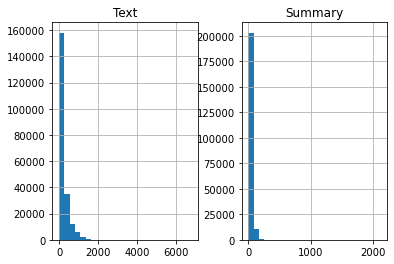

In [122]:
#Plotting lengths of examples in both Text and Summary columns
text_count = []
sum_count = []

for t in data['Clean Text']:
    text_count.append(len(t.split()))

for t in data['Clean Summary']:
    sum_count.append(len(t.split()))

length = pd.DataFrame({'Text':text_count, 'Summary':sum_count})
length.hist(bins = 25)
plt.show()

We see that the majority of entries have texts at a max of 2000 words. We could set a cap at around 800 words for the text and 100 for the summary.

In [123]:
!pip3 install wordcloud

     |████████████████████████████████| 220 kB 2.7 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158430 sha256=3cb0ac46d0f5bb64baff5be57b4ccca30ae5e92cfb791cf1a6c66cc640721bd1
  Stored in directory: /Users/psicurello/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


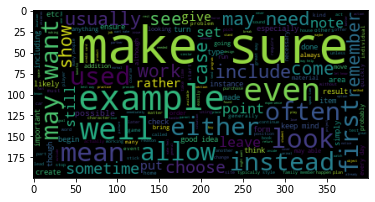

In [125]:
#Create word cloud for frequency of words in the text and summary columns
from wordcloud import WordCloud

#Compile text data and summary data
sum_dat = ""
txt_dat = ""

for t in data['Clean Summary']:
    sum_dat += (t + " ")

for t in data['Clean Text']:
    txt_dat += (t + " ")

#Generate word cloud objects
wordcloud_sum = WordCloud().generate(sum_dat)
wordcloud_txt = WordCloud().generate(txt_dat)

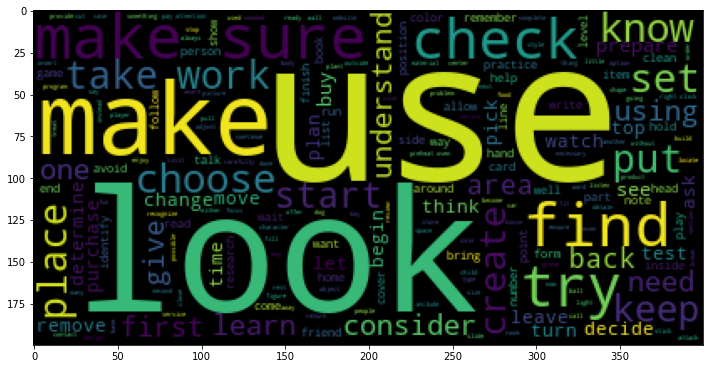

In [128]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_sum)
plt.show()

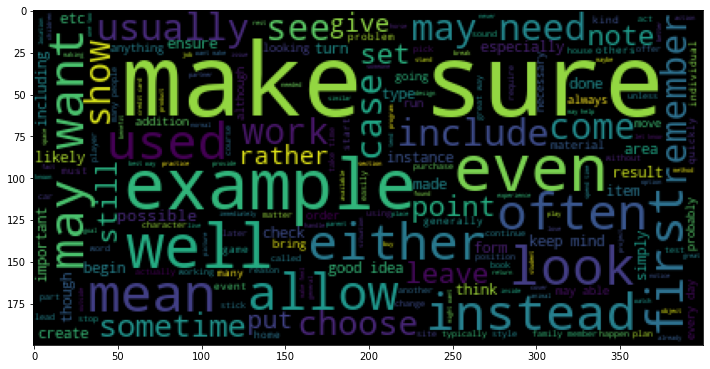

In [130]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_txt)
plt.show()

Though this doesn't give us much in the way of usable information, it is interesting to note that "make sure" appears in both the summary and text examples the most. This means we should definitely expect to see it in our model-generated summaries.

On top of this, many of the most frequent words in the summaries are commands such as "create", "find", "check", "place", etc.